In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

### Read in Audio File

In [10]:

audio_path = 'data/audio/bidasxlymp.wav'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [11]:
Audio(data=x, rate=sr)

### Show Audio File as a Waveform

Text(84.375, 0.5, 'Amplitude')

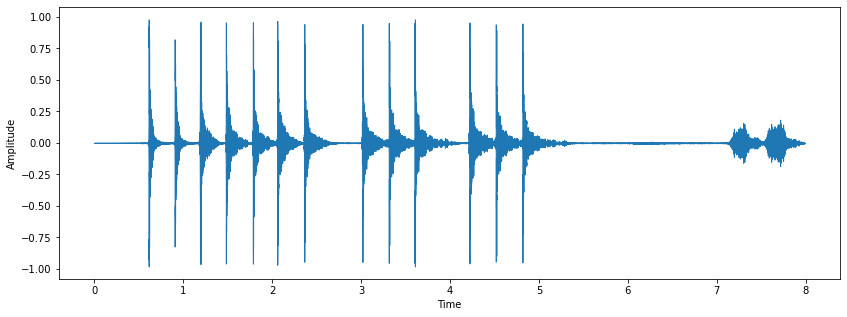

In [12]:
x, sr = librosa.load(audio_path)
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
plt.xlabel('Time')
plt.ylabel('Amplitude')

In [18]:
# draw a line at amp = 5
# plt.figure(figsize=(14, 5))
# plt.plot(times, normalize(onset_env))
# plt.grid()
# plt.xlabel('Time')
# plt.ylabel('Amplitude')
# plt.axhline(.25, color='r', linestyle='--')

# Get Number of Amplitude Spikes

### Show Audio File as a Spectrogram

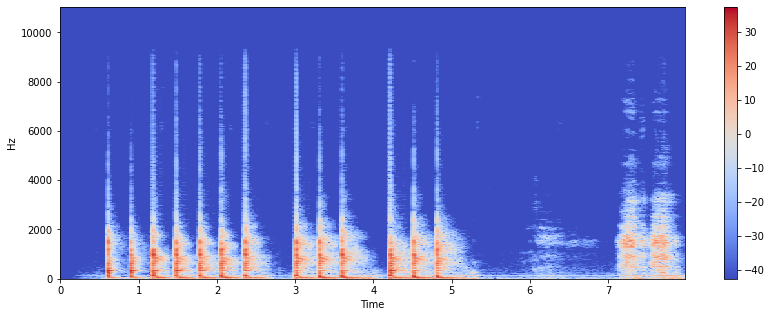

In [13]:
#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [31]:
tempo = librosa.beat.tempo(x)[0]
tempo

123.046875

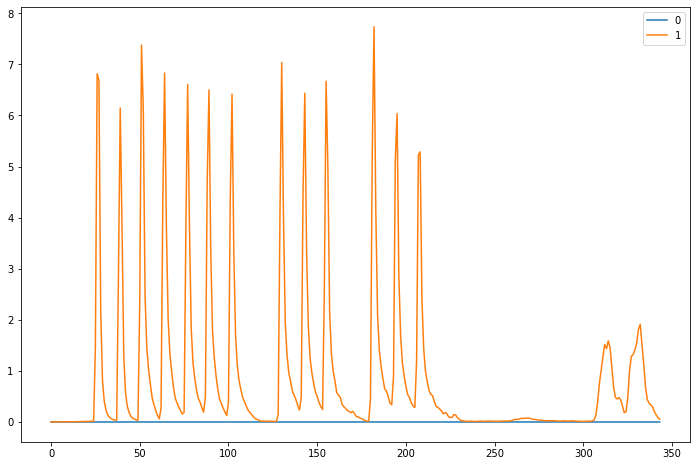

In [14]:
poly_features=librosa.feature.poly_features(x) #order 1 by default


plt.figure(figsize=(12,8))
# print(poly_features.shape)
# print(poly_features[1])
plt.plot(poly_features[0], label="0")
plt.plot(poly_features[1], label="1")
plt.legend()
plt.show()

In [33]:
# mmake aarray where every value is 1 if amp > .5, 0 otherwise
# norm = normalize(onset_env)

norm = poly_features[1]

# if val inn norm is > .5, set to 1, else 0
onset_frames = norm > 2
onset_frames = onset_frames.astype(int)

# find changes from 0 to 1
onset_frames = np.diff(onset_frames)

# find indices where changes occur
onset_frames = np.where(onset_frames == 1)[0]

print(onset_frames)
difference_array = np.diff(onset_frames)
print(difference_array)
len(onset_frames)



[  9  29  36  51  76  84  95 109 129 137 150]
[20  7 15 25  8 11 14 20  8 13]


11

### Zero Crossing Rate

"The zero crossing rate is the rate of sign-changes along a signal, i.e., the rate at which the signal changes from positive to negative or back. This feature has been used heavily in both speech recognition and music information retrieval. It usually has higher values for highly percussive sounds like those in metal and rock."

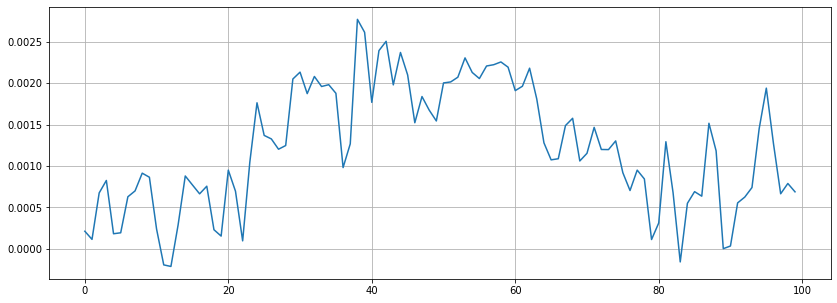

In [221]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [222]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

4


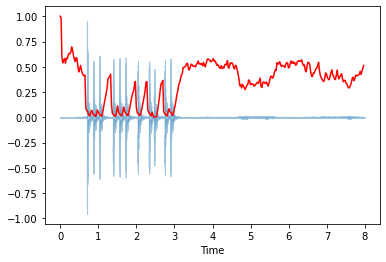

In [223]:
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

(20, 344)


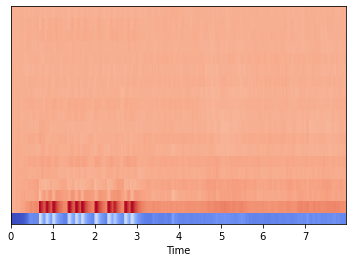

In [224]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

Text(0.5, 1.0, '')

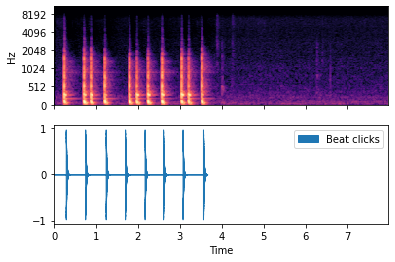

In [34]:
tempo, beats = librosa.beat.beat_track(y=x, sr=sr)
times = librosa.frames_to_time(beats, sr=sr)
y_beat_times = librosa.clicks(times=times, sr=sr)

fig, ax = plt.subplots(nrows=2, sharex=True)
S = librosa.feature.melspectrogram(y=x, sr=sr)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                         x_axis='time', y_axis='mel', ax=ax[0])
librosa.display.waveshow(y_beat_times, sr=sr, label='Beat clicks',
                         ax=ax[1])
ax[1].legend()
ax[0].label_outer()
ax[0].set_title(None)